In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path
from typing import Dict

In [8]:
Path.cwd()

PosixPath('/Users/mseifrid/Aspuru-Guzik Lab Dropbox/Martin Seifrid/Matter Lab/Data/Code/ML for OPV/code_/preprocessing')

In [14]:
file = Path.cwd().parent.parent / "datasets/Min_2020_n558/raw/solvent properties.csv"
print(file)
print(file.exists())
    
    # Path("../../datasets/Min_2020_n558/raw/solvation_properties.csv").absolute())
# [p for p in file.parents]
# solv_props = pd.read_csv()

/Users/mseifrid/Aspuru-Guzik Lab Dropbox/Martin Seifrid/Matter Lab/Data/Code/ML for OPV/datasets/Min_2020_n558/raw/solvent properties.csv
True


In [36]:
def count_high_correlation_features(correlation_matrix: pd.DataFrame, threshold: float) -> Dict[str, int]:
    """
    Count the number of times each feature in a correlation matrix has coefficients greater than the specified threshold.

    Parameters:
    - correlation_matrix (pd.DataFrame): The correlation matrix.
    - threshold (float): The threshold value.

    Returns:
    - Dict[str, int]: A dictionary where keys are feature names, and values are the count of times they cross the threshold.
    """
    # Select upper triangle of the correlation matrix
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

    # Count the number of times each feature crosses the threshold
    feature_counts = (abs(upper_triangle) > threshold).sum()

    # Convert the counts to a dictionary
    feature_counts_dict = feature_counts.to_dict()

    # Sort the dictionary based on values (count of times the threshold is crossed)
    sorted_feature_counts = dict(sorted(feature_counts_dict.items(), key=lambda item: item[1], reverse=True))

    return sorted_feature_counts

def plot_correlations():
    spearman = solv_props.corr(method="spearman")
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(spearman, annot=True, cmap="vlag", vmin=-1, vmax=1, fmt=".1f")

In [17]:
solv_props = pd.read_csv(file, index_col="Name")
solv_props = solv_props[["dipole", "dD", "dP", "dH", "dHDon", "dHAcc", "MW", "Density", "BPt", "MPt",
        "logKow", "RI", "Trouton", "RER", "ParachorGA", "RD", "DCp", "log n", "SurfTen"]]
solv_props.head()

,dipole,dD,dP,dH,dHDon,dHAcc,MW,Density,BPt,MPt,logKow,RI,Trouton,RER,ParachorGA,RD,DCp,log n,SurfTen
Name,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_,0.00,0.0,0.0,0.0,0.000000,0.000000,0.00,0.000,0.00,0.0,0.000,0.00000,0.000000,0.000000,0.000,0.000,0.00,0.0000,0.000000
CN,1.55,20.5,4.9,2.5,0.600000,3.300000,162.62,1.194,259.00,-4.0,4.000,1.63300,-47.720000,-91.200000,0.705,346.500,48.94,230.8000,143.600000
DIO,2.09,18.1,3.3,3.0,2.884403,2.014923,366.02,1.840,364.69,18.5,5.033,1.56231,94.512038,0.041266,503.200,64.939,308.08,0.8416,49.239665
DPE,1.17,19.4,3.4,4.0,0.100000,4.900000,170.21,1.073,258.00,27.0,4.210,1.57800,-51.050000,-95.000000,0.457,395.600,52.87,274.3000,146.200000


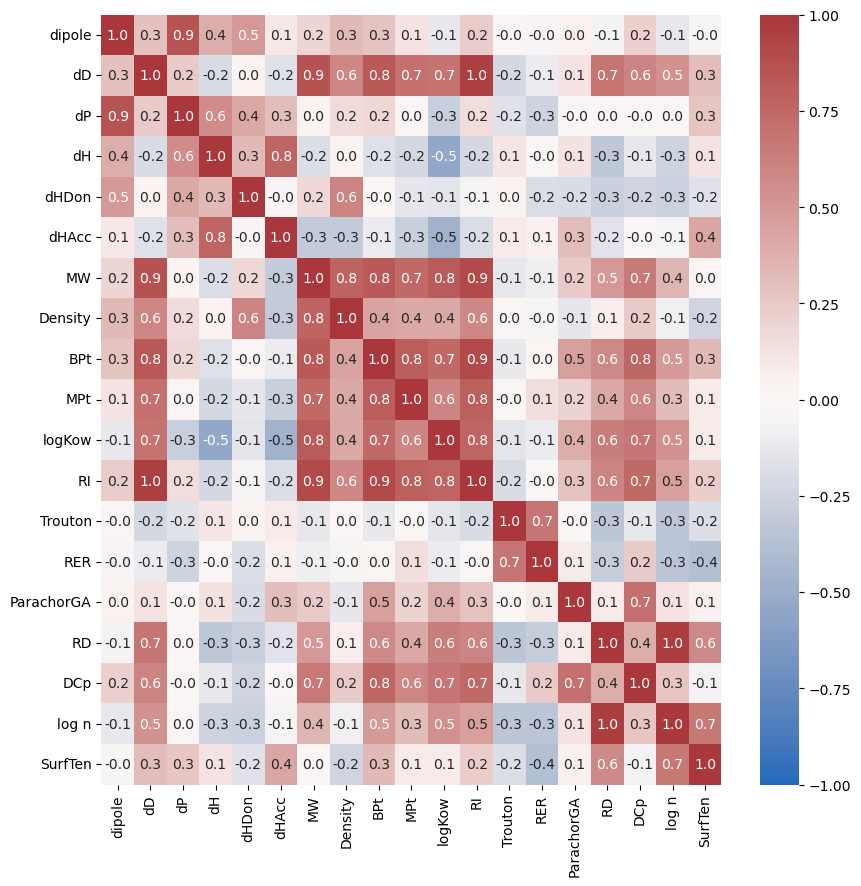

In [49]:
spearman = solv_props.corr(method="spearman")
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(spearman, annot=True, cmap="vlag", vmin=-1, vmax=1, fmt=".1f")

In [37]:
count_high_correlation_features(spearman, 0.8)

{'RI': 3,
 'BPt': 2,
 'dP': 1,
 'MW': 1,
 'MPt': 1,
 'logKow': 1,
 'log n': 1,
 'dipole': 0,
 'dD': 0,
 'dH': 0,
 'dHDon': 0,
 'dHAcc': 0,
 'Density': 0,
 'Trouton': 0,
 'RER': 0,
 'ParachorGA': 0,
 'RD': 0,
 'DCp': 0,
 'SurfTen': 0}

In [44]:
solv_props = solv_props[["dipole", "dD", "dP", "dH", "dHDon", "dHAcc", "MW", "Density", "BPt", "MPt",
        "logKow", "Trouton", "RER", "ParachorGA", "RD", "DCp", "log n", "SurfTen"]]
spear2 = solv_props.corr(method="spearman")
count_high_correlation_features(spear2, 0.8)

{'dD': 0,
 'dP': 0,
 'dH': 0,
 'dHDon': 0,
 'dHAcc': 0,
 'Density': 0,
 'MPt': 0,
 'logKow': 0,
 'Trouton': 0,
 'RER': 0,
 'ParachorGA': 0,
 'DCp': 0,
 'log n': 0,
 'SurfTen': 0}

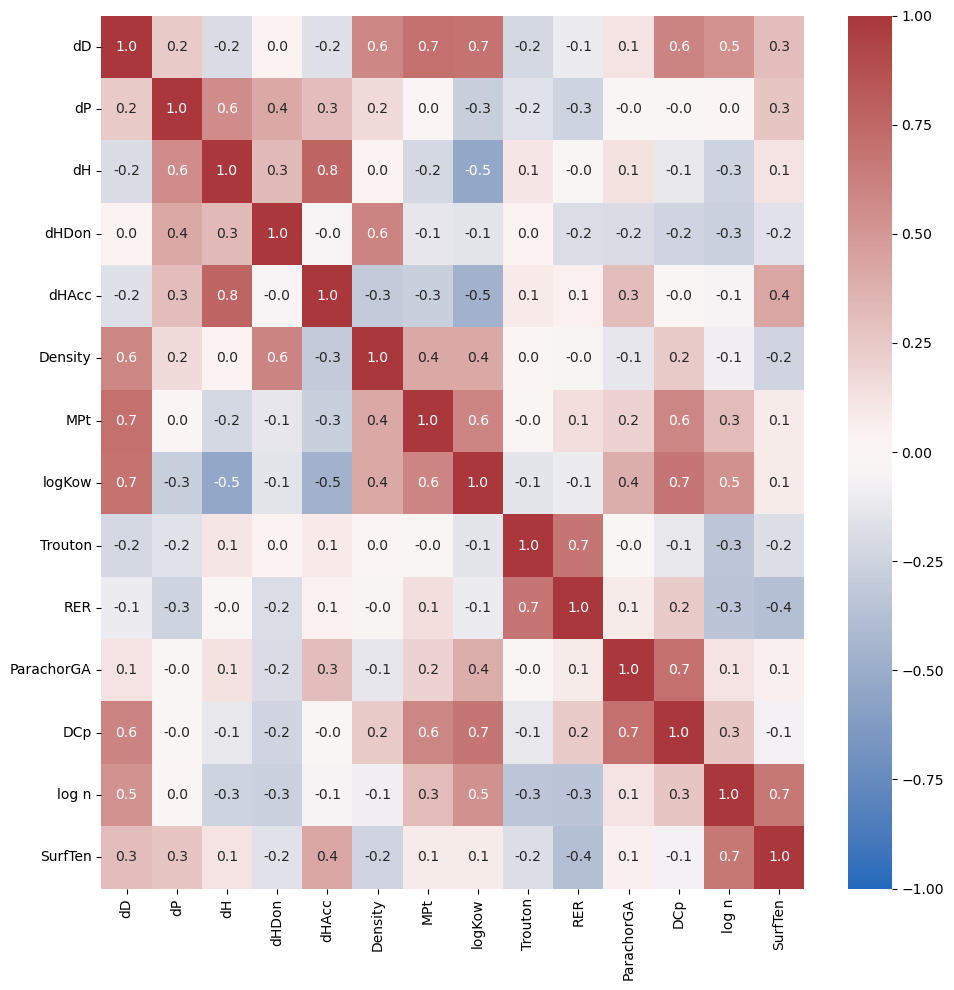

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(spear2, annot=True, cmap="vlag", vmin=-1, vmax=1, fmt=".1f")
plt.tight_layout()
plt.show()